## Reconstruction and evaluation

In [2]:
import os
import sys
# add your module path
module_path = os.path.abspath(os.path.join('..')) # '.'
if module_path not in sys.path:
    sys.path.append(module_path)
# change your base path
os.chdir('../') # '../'
print(os.getcwd())

/home/yyjau/Documents/object_code/DeepSDF


In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
class foo(object):
    def __init__(self):
        pass

paths = foo()
    
# files
paths.sub_path = 'ShapeNetV2/04256520'
paths.recon_path = 'examples/sofas/Reconstructions/2000/Meshes'
paths.recon_file = 'cc644fad0b76a441d84c7dc40ac6d743'
paths.recon_ext = '.ply'

paths.sample_path = 'data/SdfSamples'
paths.sample_ext = '.npz'



In [5]:
# sample file
import deep_sdf
sample_file = f"{paths.sample_path}/{paths.sub_path}/{paths.recon_file}{paths.sample_ext}"
data_sdf = deep_sdf.data.read_sdf_samples_into_ram(sample_file)

In [6]:
data_sdf
[sample_pos, sample_neg] = data_sdf
sample_pos_np = sample_pos.numpy()
sample_neg_np = sample_neg.numpy()
print(f"sample_pos_np: {sample_pos_np.shape}")
from utils.utils_misc import crop_or_pad_choice

n_samples = 500
idx = crop_or_pad_choice(sample_pos_np.shape[0], n_samples, shuffle=True)
pos_np_s = sample_pos_np[idx]

sample_pos_np: (158169, 4)


plot histogram
dim: 0


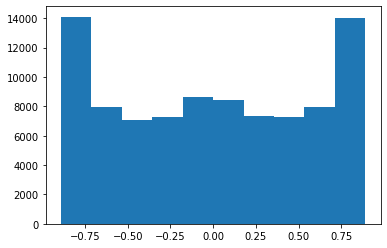

dim: 1


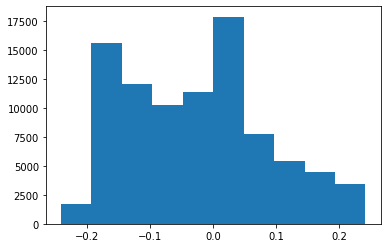

dim: 2


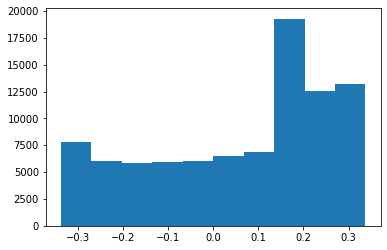

dim: 3


/home/yyjau/anaconda3/envs/py36-objectCode/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/yyjau/anaconda3/envs/py36-objectCode/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


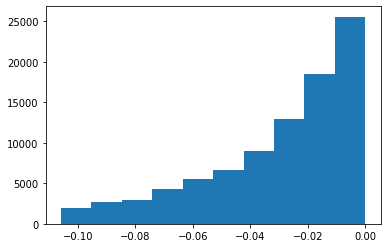

In [9]:
sample_neg_np.shape
print(f"plot histogram")
def plot_hist(arr, n_bins=None):
    import matplotlib.pyplot as plt
    for i in range(arr.shape[1]):
        print(f"dim: {i}")
        plt.hist(arr[:,i], bins=n_bins)
        plt.show()
        
plot_hist(sample_neg_np)

In [11]:

import numpy as np
import open3d as o3d
from open3d import JVisualizer


def open3d_vis(points, colors=None):
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(points)
    if colors is not None:
        pcd.colors = o3d.utility.Vector3dVector(colors)

    visualizer = JVisualizer()
    visualizer.add_geometry(pcd)
    visualizer.show()

points = (np.random.rand(1000, 3) - 0.5) / 4
colors = np.random.rand(1000, 3)

open3d_vis(points, colors)


JVisualizer with 1 geometries

In [13]:
## Use open3d for visualization
# from notebooks.vis_tools import open3d_vis
# open3d_vis(sample_pos_np[:,:3])
# open3d_vis(sample_neg_np[:,:3])


from notebooks.vis_tools import open3d_pcd_vis
# use mean loss
# path_temp = '/home/yyjau/Documents/object_code/DeepSDF/examples/chairs_igr/Reconstructions/100/Meshes/ShapeNetV2/03001627/e9e224bc0a0787d8320f10afdfbaa18.ply'
# path_temp = 'examples/chairs_smoothl1_20200804/TrainingMeshes/200/ShapeNetV2/03001627/1022fe7dd03f6a4d4d5ad9f13ac9f4e7.ply'
# path_temp = 'examples/chairs_igr/TrainingMeshes/100/ShapeNetV2/03001627/1022fe7dd03f6a4d4d5ad9f13ac9f4e7.ply'
# path_temp = 'examples/chairs_igr-loss_v0/TrainingMeshes/200/ShapeNetV2/03001627/1022fe7dd03f6a4d4d5ad9f13ac9f4e7.ply'
path_temp = 'examples/chairs_igr-net-loss_v0_20200813/TrainingMeshes/90/ShapeNetV2/03001627/1022fe7dd03f6a4d4d5ad9f13ac9f4e7.ply'

pcd = o3d.io.read_point_cloud(path_temp)
open3d_pcd_vis(pcd)


JVisualizer with 1 geometries

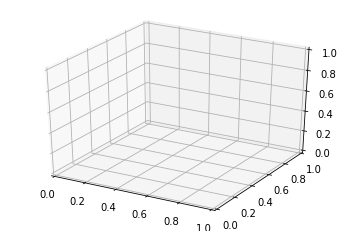

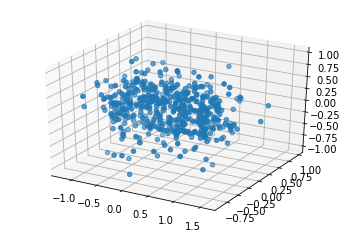

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


def scatter_3d(arr):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(arr[:,0], arr[:,1], arr[:,2])
    
scatter_3d(pos_np_s)

### visualization for reconstruction

In [7]:
recon_file = f"{paths.recon_path}/{paths.sub_path}/{paths.recon_file}{paths.recon_ext}"
recon_file

'examples/sofas/Reconstructions/2000/Meshes/ShapeNetV2/04256520/cc644fad0b76a441d84c7dc40ac6d743.ply'

In [8]:
import open3d as o3d

In [9]:
o3d.__version__

'0.9.0.0'

In [10]:
pcd = o3d.io.read_point_cloud(recon_file)
pcd_np = np.asarray(pcd.points)
print(f"pcd_np: {pcd_np.shape}")
n_samples = 5000
idx = crop_or_pad_choice(pcd_np.shape[0], n_samples, shuffle=True)
pcd_np_s = pcd_np[idx]

from notebooks.vis_tools import open3d_pcd_vis
open3d_pcd_vis(pcd)
# scatter_3d(pcd_np_s)
# o3d.visualization.draw_geometries([pcd], zoom=0.3412,
#                                   front=[0.4257, -0.2125, -0.8795],
#                                   lookat=[2.6172, 2.0475, 1.532],
#                                   up=[-0.0694, -0.9768, 0.2024])

pcd_np: (72254, 3)


JVisualizer with 1 geometries

In [30]:
# import numpy as np
# import open3d as o3d
# # from open3d import JVisualizer

# points = (np.random.rand(1000, 3) - 0.5) / 4
# colors = np.random.rand(1000, 3)

# pcd = o3d.geometry.PointCloud()
# pcd.points = o3d.utility.Vector3dVector(points)
# pcd.colors = o3d.utility.Vector3dVector(colors)


# # visualizer = JVisualizer()
# visualizer = o3d.JVisualizer()
# visualizer.add_geometry(pcd)
# visualizer.show()

TypeError: 'module' object is not callable

## Open3d

In [1]:
import numpy as np
import open3d as o3d
from open3d import JVisualizer



points = (np.random.rand(1000, 3) - 0.5) / 4
colors = np.random.rand(1000, 3)

def open3d_vis(points, colors=None):
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(points)
    if colors is not None:
        pcd.colors = o3d.utility.Vector3dVector(colors)

    visualizer = JVisualizer()
    visualizer.add_geometry(pcd)
    visualizer.show()
    
open3d_vis(points, colors)

JVisualizer with 1 geometries

In [1]:
import matplotlib
%matplotlib inline
# matplotlib.use('TKAgg') 

AttributeError: module 'open3d.open3d' has no attribute '_GLIBCXX_USE_CXX11_ABI'